<a href="https://colab.research.google.com/github/SANGRAMLEMBE/MTech/blob/main/Deep_Neural_Network/Practical/Week3/Week3_Understanding_Tensor_Operations_and_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing mathematical tools
import numpy as np                # for numerical computing
import matplotlib.pyplot as plt   # For plotting graphs and visualization
import tensorflow as tf           # For nerual network operationas and tensors


In [2]:
# Makes our plots look nice

plt.style.use('default')    # Use the default Matplotlib style for consistency across plots
plt.rcParams['figure.figsize'] = (10,6)  # set a larger default figure size for readability

In [3]:
# Set random seeds so we get consistent results
np.random.seed(42)        # fix Numpy range so random weights are Reproducible
tf.random.set_seed(42)    #  fix tensorflow range so random weights are Reproducible

In [4]:

print("🔧 Environment Setup Complete!")  # Status message: setup finished
print(f"✅ NumPy version: {np.__version__} (like MATLAB for Python)")  # Show NumPy version used
print(f"✅ TensorFlow version: {tf.__version__} (for neural networks)") # Show TensorFlow version used
print("\n🎯 Ready to learn! Let's start with the basics...")  # On-screen prompt for learners

🔧 Environment Setup Complete!
✅ NumPy version: 2.0.2 (like MATLAB for Python)
✅ TensorFlow version: 2.19.0 (for neural networks)

🎯 Ready to learn! Let's start with the basics...


## Part 1: Understanding Activation Functions

### 🤔 What Are Activation Functions?

Think of activation functions as **smart switches** or **signal processors**:


- **For Everyone**: Mathematical functions that decide "how much" a neuron should activate

### 🎯 Why Do We Need Them?
Without activation functions, neural networks would just be linear equations (boring!). Activation functions add **non-linearity**, making networks capable of learning complex patterns.



### Task 1A: The Sigmoid Function 📈

**Concept**: Sigmoid is like a **soft switch** that gradually turns on/off.

**Mathematical Formula**: σ(x) = 1/(1+e^(-x))

**Real-world Analogy**:
- **ECE**: Like a soft-limiting amplifier or a smooth rectifier
- **Mechanical**: Like a pressure relief valve that gradually opens

**Properties**:
- Input: Any real number (-∞ to +∞)
- Output: Always between 0 and 1 (like a probability)
- Smooth S-shaped curve


- Sigmoid maps real numbers to (0,1), is differentiable, and is often interpreted as a probability-like output; its saturation at extremes explains vanishing gradients.

In [5]:
# Implimentation of Sigmoid function
def sigmoid_function(x):
  # Formula: 1 / (1 + e^(-x))                       # Mathematical definition shown for clarity [1]
    return 1 / (1 + np.exp(-x))                       # Vectorized implementation using NumPy exp [1]

In [10]:
# Testing of Sigmoid Functn
test_values = [-5, -2, -1, 0, 1 ,3 ,5]
print("Testing Sigmoid Function: ")


for x in test_values:
  result = sigmoid_function(x)
  print(f"{x:3d}  --> {result:4f}")

print("   • Negative inputs give outputs close to 0")
print("   • Zero input gives exactly 0.5")
print("   • Positive inputs give outputs close to 1")

Testing Sigmoid Function: 
 -5  --> 0.006693
 -2  --> 0.119203
 -1  --> 0.268941
  0  --> 0.500000
  1  --> 0.731059
  3  --> 0.952574
  5  --> 0.993307
   • Negative inputs give outputs close to 0
   • Zero input gives exactly 0.5
   • Positive inputs give outputs close to 1


In [22]:
# Visualization of Sigmoid Function

x = np.linspace(-6,6,50)  # 100 evenly spaced x values from -6 to 6
y = sigmoid_function(x)

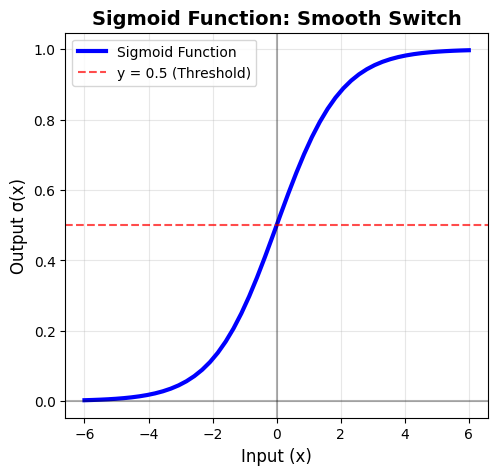

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)                    # Subplot 1 of 2
plt.plot(x,y,'b-',linewidth=3,label = "Sigmoid Function")  #S-shaped Curve

plt.axhline(y = 0.5 ,color = 'r', linestyle = '--', alpha = 0.7 , label = 'y = 0.5 (Threshold)')  # Highlight midpoint

plt.axvline(x=0 ,color = 'k', linestyle = '-', alpha = 0.3)    # Vertical axis for reference
plt.axhline(y=0 , color = 'k',linestyle = '-', alpha = 0.3)    # Horizontal axis for reference

plt.xlabel('Input (x)', fontsize=12)                 # Axis label
plt.ylabel('Output σ(x)', fontsize=12)               # Axis label
plt.title('Sigmoid Function: Smooth Switch', fontsize=14, fontweight='bold')  # Title
plt.legend()                                         # Show legend entries
plt.grid(True, alpha=0.3)                            # Light grid to read values

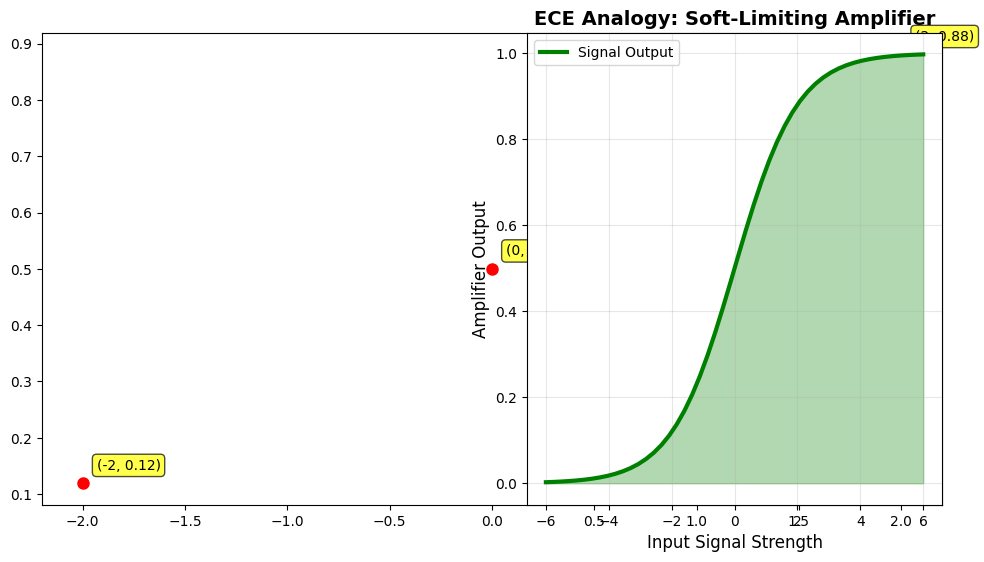

📊 Key Insights:
   • The sigmoid 'squashes' any input to between 0 and 1
   • It's smooth and differentiable everywhere (good for learning)
   • Acts like a soft switch - gradual transition, not abrupt


In [24]:
# Show some key points
key_points_x = [-2, 0, 2]
key_points_y = [sigmoid_function(xi) for xi in key_points_x]
plt.plot(key_points_x, key_points_y, 'ro', markersize=8)

# Add annotations
for i, (xi, yi) in enumerate(zip(key_points_x, key_points_y)):
    plt.annotate(f'({xi}, {yi:.2f})', (xi, yi),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Create an analogy plot for ECE students
plt.subplot(1, 2, 2)
plt.plot(x, y, 'g-', linewidth=3, label='Signal Output')
plt.fill_between(x, 0, y, alpha=0.3, color='green')
plt.xlabel('Input Signal Strength', fontsize=12)
plt.ylabel('Amplifier Output', fontsize=12)
plt.title('ECE Analogy: Soft-Limiting Amplifier', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Key Insights:")
print("   • The sigmoid 'squashes' any input to between 0 and 1")
print("   • It's smooth and differentiable everywhere (good for learning)")
print("   • Acts like a soft switch - gradual transition, not abrupt")

### 🤔 Concept Check: Sigmoid



1. **What happens when x = 0?**
--> sigmoid(0) = 0.5
2. **What happens with very large positive x?**
--> sigmoid approaches 1
3. **What happens with very large negative x?**
(Answer: sigmoid approaches 0)
4. **Why is this useful in neural networks?**
(Answer: It gives a probability-like output)

### Task 1B: The ReLU Function ⚡

**Concept**: ReLU (Rectified Linear Unit) is like a **one-way valve** or **diode**.

**Mathematical Formula**: f(x) = max(0, x)

**Real-world Analogy**:
- **ECE**: Like a perfect diode that blocks negative voltages, passes positive ones


**Properties**:
- Input: Any real number
- Output: 0 for negative inputs, x for positive inputs
- Simple and fast to compute

In [25]:
def relu_function(x):
    """
    ReLU (Rectified Linear Unit) activation function

    Think of this as a one-way valve:
    - Negative x → output = 0 (valve closed)
    - Positive x → output = x (valve open, signal passes through)
    """
    # TODO: Implement ReLU function
    # Formula: max(0, x)
    # Hint: Use np.maximum(0, x) for element-wise maximum

    # YOUR CODE HERE:
    return np.maximum(0, x)  # <-- Fill this in

# Test the ReLU function
test_values = [-5, -2, -1, 0, 1, 2, 5]
print("🧪 Testing ReLU Function:")
print("Input  → Output")
print("-" * 15)

for x in test_values:
    result = relu_function(x)
    print(f"{x:3d}    → {result:.1f}")

print("\n💡 Notice how:")
print("   • Negative inputs become 0 (blocked)")
print("   • Positive inputs pass through unchanged")
print("   • Zero stays zero")

🧪 Testing ReLU Function:
Input  → Output
---------------
 -5    → 0.0
 -2    → 0.0
 -1    → 0.0
  0    → 0.0
  1    → 1.0
  2    → 2.0
  5    → 5.0

💡 Notice how:
   • Negative inputs become 0 (blocked)
   • Positive inputs pass through unchanged
   • Zero stays zero


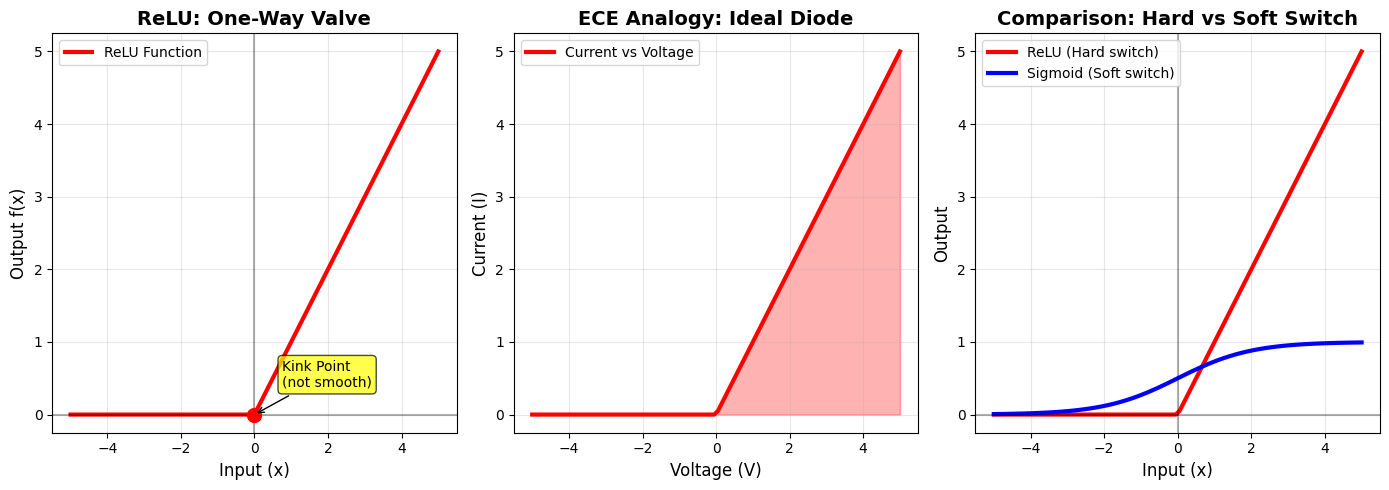

📊 Key Insights:
   • ReLU is simple: just cut off negative values
   • It's like a hard switch (abrupt transition at x=0)
   • Very fast to compute (just a comparison and selection)
   • Most popular activation function in modern neural networks


In [26]:
# Visualize ReLU function
x = np.linspace(-5, 5, 100)
y_relu = relu_function(x)
y_sigmoid = sigmoid_function(x)  # For comparison

plt.figure(figsize=(14, 5))

# ReLU function
plt.subplot(1, 3, 1)
plt.plot(x, y_relu, 'r-', linewidth=3, label='ReLU Function')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output f(x)', fontsize=12)
plt.title('ReLU: One-Way Valve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Mark the "kink" at x=0
plt.plot(0, 0, 'ro', markersize=10, label='Kink at origin')
plt.annotate('Kink Point\n(not smooth)', (0, 0),
            xytext=(20, 20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->'))

# ECE Analogy: Diode characteristic
plt.subplot(1, 3, 2)
plt.plot(x, y_relu, 'r-', linewidth=3, label='Current vs Voltage')
plt.fill_between(x[x>=0], 0, y_relu[x>=0], alpha=0.3, color='red')
plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Current (I)', fontsize=12)
plt.title('ECE Analogy: Ideal Diode', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare ReLU vs Sigmoid
plt.subplot(1, 3, 3)
plt.plot(x, y_relu, 'r-', linewidth=3, label='ReLU (Hard switch)')
plt.plot(x, y_sigmoid, 'b-', linewidth=3, label='Sigmoid (Soft switch)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('Comparison: Hard vs Soft Switch', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Key Insights:")
print("   • ReLU is simple: just cut off negative values")
print("   • It's like a hard switch (abrupt transition at x=0)")
print("   • Very fast to compute (just a comparison and selection)")
print("   • Most popular activation function in modern neural networks")

In [27]:
def sigmoid_gradient(x):
    """
    Derivative of sigmoid function
    Formula: σ'(x) = σ(x) * (1 - σ(x))
    """
    # TODO: Implement sigmoid gradient
    # Hint: First compute sigmoid(x), then use the formula above

    # YOUR CODE HERE:
    s = sigmoid_function(x)
    return s * (1 - s)  # <-- Fill this in

def relu_gradient(x):
    """
    Derivative of ReLU function
    Formula: 1 if x > 0, 0 if x <= 0
    """
    # TODO: Implement ReLU gradient
    # Hint: Use np.where(condition, value_if_true, value_if_false)

    # YOUR CODE HERE:
    return np.where(x > 0, 1.0, 0.0)  # <-- Fill this in

# Test gradients
test_values = np.array([-3, -1, 0, 1, 3])

print("🧪 Testing Gradient Functions:")
print("\nSigmoid Gradients:")
print("Input  → Gradient")
print("-" * 17)
for x in test_values:
    grad = sigmoid_gradient(x)
    print(f"{x:3.0f}    → {grad:.4f}")

print("\nReLU Gradients:")
print("Input  → Gradient")
print("-" * 17)
for x in test_values:
    grad = relu_gradient(x)
    print(f"{x:3.0f}    → {grad:.1f}")

print("\n💡 Key Observations:")
print("   • Sigmoid gradient is maximum at x=0 (0.25)")
print("   • Sigmoid gradient approaches 0 for large |x| (vanishing gradient problem!)")
print("   • ReLU gradient is either 0 or 1 (no vanishing gradient for positive values)")

🧪 Testing Gradient Functions:

Sigmoid Gradients:
Input  → Gradient
-----------------
 -3    → 0.0452
 -1    → 0.1966
  0    → 0.2500
  1    → 0.1966
  3    → 0.0452

ReLU Gradients:
Input  → Gradient
-----------------
 -3    → 0.0
 -1    → 0.0
  0    → 0.0
  1    → 1.0
  3    → 1.0

💡 Key Observations:
   • Sigmoid gradient is maximum at x=0 (0.25)
   • Sigmoid gradient approaches 0 for large |x| (vanishing gradient problem!)
   • ReLU gradient is either 0 or 1 (no vanishing gradient for positive values)


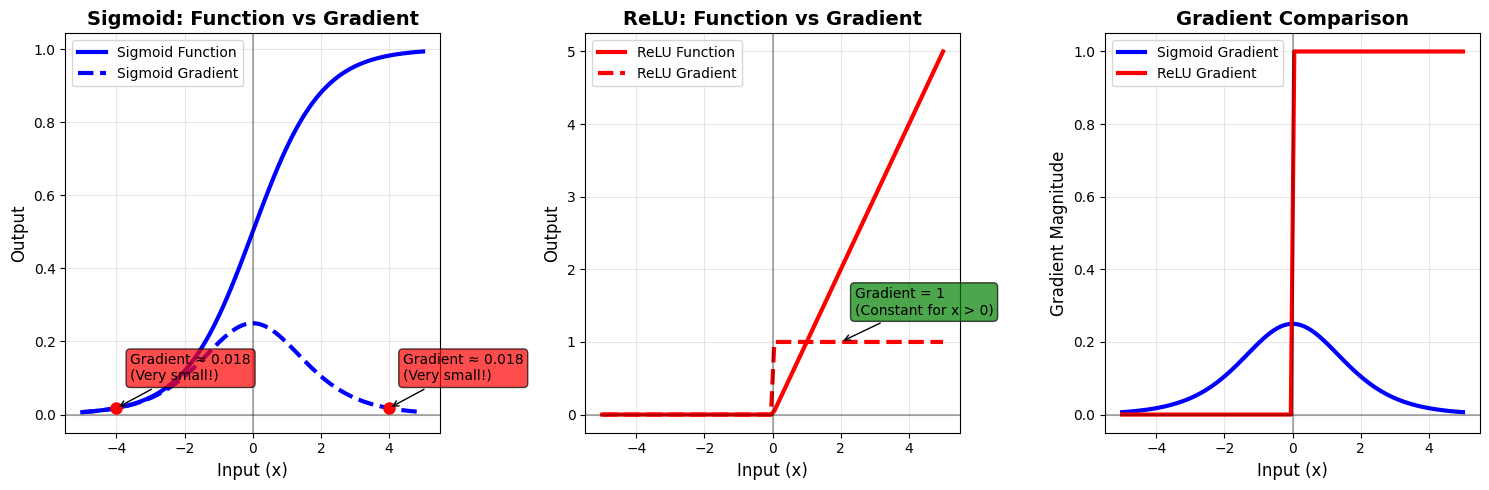

🔍 Why This Matters for Learning:
   • Large gradients = fast learning
   • Small gradients = slow learning (vanishing gradient problem)
   • Zero gradients = no learning (dead neurons)
   • This is why ReLU is so popular - it doesn't vanish for positive inputs!


In [28]:
# Visualize gradients to understand the "vanishing gradient" problem
x = np.linspace(-5, 5, 100)
sigmoid_grad = sigmoid_gradient(x)
relu_grad = relu_gradient(x)

plt.figure(figsize=(15, 5))

# Sigmoid and its gradient
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid_function(x), 'b-', linewidth=3, label='Sigmoid Function')
plt.plot(x, sigmoid_grad, 'b--', linewidth=3, label='Sigmoid Gradient')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('Sigmoid: Function vs Gradient', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight the vanishing gradient problem
vanish_x = [-4, 4]
vanish_y = [sigmoid_gradient(xi) for xi in vanish_x]
plt.plot(vanish_x, vanish_y, 'ro', markersize=8)
for xi, yi in zip(vanish_x, vanish_y):
    plt.annotate(f'Gradient ≈ {yi:.3f}\n(Very small!)', (xi, yi),
                xytext=(10, 20), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7),
                arrowprops=dict(arrowstyle='->'))

# ReLU and its gradient
plt.subplot(1, 3, 2)
plt.plot(x, relu_function(x), 'r-', linewidth=3, label='ReLU Function')
plt.plot(x, relu_grad, 'r--', linewidth=3, label='ReLU Gradient')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('ReLU: Function vs Gradient', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Annotate the constant gradient
plt.annotate('Gradient = 1\n(Constant for x > 0)', (2, 1),
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='green', alpha=0.7),
            arrowprops=dict(arrowstyle='->'))

# Compare gradient magnitudes
plt.subplot(1, 3, 3)
plt.plot(x, sigmoid_grad, 'b-', linewidth=3, label='Sigmoid Gradient')
plt.plot(x, relu_grad, 'r-', linewidth=3, label='ReLU Gradient')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Gradient Magnitude', fontsize=12)
plt.title('Gradient Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 Why This Matters for Learning:")
print("   • Large gradients = fast learning")
print("   • Small gradients = slow learning (vanishing gradient problem)")
print("   • Zero gradients = no learning (dead neurons)")
print("   • This is why ReLU is so popular - it doesn't vanish for positive inputs!")

In [29]:
# Let's create different types of tensors
print("🔢 Creating Different Types of Tensors\n")

# Scalar (0D)
scalar = tf.constant(5.0)
print(f"📍 Scalar (0D tensor):")
print(f"   Value: {scalar.numpy()}")
print(f"   Shape: {scalar.shape} (no dimensions)")
print(f"   Think: A single measurement (temperature, voltage, etc.)\n")

# Vector (1D)
vector = tf.constant([1, 2, 3, 4], dtype=tf.float32)
print(f"📏 Vector (1D tensor):")
print(f"   Values: {vector.numpy()}")
print(f"   Shape: {vector.shape} (4 elements in a line)")
print(f"   Think: Time series data, signal samples, coordinates\n")

# Matrix (2D)
matrix = tf.constant([[1, 2, 3],
                      [4, 5, 6]], dtype=tf.float32)
print(f"🔲 Matrix (2D tensor):")
print(f"   Values:\n{matrix.numpy()}")
print(f"   Shape: {matrix.shape} (2 rows, 3 columns)")
print(f"   Think: Image data, transformation matrix, spreadsheet\n")

# 3D Tensor
tensor_3d = tf.constant([[[1, 2], [3, 4]],
                         [[5, 6], [7, 8]]], dtype=tf.float32)
print(f"📦 3D Tensor:")
print(f"   Values:\n{tensor_3d.numpy()}")
print(f"   Shape: {tensor_3d.shape} (2 matrices, each 2×2)")
print(f"   Think: Stack of images, batch of data, RGB color channels\n")

print("💡 Key Point: The 'shape' tells you the dimensions")
print("   Shape (4,) = vector with 4 elements")
print("   Shape (2, 3) = matrix with 2 rows, 3 columns")
print("   Shape (2, 2, 2) = 2 matrices, each 2×2")

🔢 Creating Different Types of Tensors

📍 Scalar (0D tensor):
   Value: 5.0
   Shape: () (no dimensions)
   Think: A single measurement (temperature, voltage, etc.)

📏 Vector (1D tensor):
   Values: [1. 2. 3. 4.]
   Shape: (4,) (4 elements in a line)
   Think: Time series data, signal samples, coordinates

🔲 Matrix (2D tensor):
   Values:
[[1. 2. 3.]
 [4. 5. 6.]]
   Shape: (2, 3) (2 rows, 3 columns)
   Think: Image data, transformation matrix, spreadsheet

📦 3D Tensor:
   Values:
[[[1. 2.]
  [3. 4.]]

 [[5. 6.]
  [7. 8.]]]
   Shape: (2, 2, 2) (2 matrices, each 2×2)
   Think: Stack of images, batch of data, RGB color channels

💡 Key Point: The 'shape' tells you the dimensions
   Shape (4,) = vector with 4 elements
   Shape (2, 3) = matrix with 2 rows, 3 columns
   Shape (2, 2, 2) = 2 matrices, each 2×2


In [30]:

# Matrix multiplication (you know this from linear algebra!)
print("🔄 Matrix Operations (Just Like Linear Algebra!)\n")

# Create two simple matrices
A = tf.constant([[1, 2],
                 [3, 4]], dtype=tf.float32)
B = tf.constant([[5, 6],
                 [7, 8]], dtype=tf.float32)

print("Matrix A:")
print(A.numpy())
print("\nMatrix B:")
print(B.numpy())

# Element-wise multiplication (like MATLAB .*)
element_wise = tf.multiply(A, B)  # or just A * B
print("\n🔸 Element-wise multiplication (A .* B in MATLAB):")
print(element_wise.numpy())
print("   Each element: A[i,j] * B[i,j]")

# Matrix multiplication (like MATLAB *)
matrix_mult = tf.matmul(A, B)  # or A @ B
print("\n🔹 Matrix multiplication (A * B in MATLAB):")
print(matrix_mult.numpy())
print("   Standard linear algebra multiplication")

# Let's verify the matrix multiplication manually for first element
manual_calc = A[0,0]*B[0,0] + A[0,1]*B[1,0]
print(f"\n🧮 Manual check for element [0,0]:")
print(f"   A[0,0]*B[0,0] + A[0,1]*B[1,0] = {A[0,0].numpy()}*{B[0,0].numpy()} + {A[0,1].numpy()}*{B[1,0].numpy()} = {manual_calc.numpy()}")
print(f"   Result from matrix multiplication: {matrix_mult[0,0].numpy()}")
print(f"   ✅ Match: {abs(manual_calc.numpy() - matrix_mult[0,0].numpy()) < 1e-6}")

🔄 Matrix Operations (Just Like Linear Algebra!)

Matrix A:
[[1. 2.]
 [3. 4.]]

Matrix B:
[[5. 6.]
 [7. 8.]]

🔸 Element-wise multiplication (A .* B in MATLAB):
[[ 5. 12.]
 [21. 32.]]
   Each element: A[i,j] * B[i,j]

🔹 Matrix multiplication (A * B in MATLAB):
[[19. 22.]
 [43. 50.]]
   Standard linear algebra multiplication

🧮 Manual check for element [0,0]:
   A[0,0]*B[0,0] + A[0,1]*B[1,0] = 1.0*5.0 + 2.0*7.0 = 19.0
   Result from matrix multiplication: 19.0
   ✅ Match: True


In [31]:
# Shape manipulation (reshaping, like MATLAB reshape)
print("📐 Shape Manipulation (Like MATLAB reshape)\n")

# Start with a simple matrix
original = tf.constant([[1, 2, 3],
                        [4, 5, 6]])
print(f"Original matrix ({original.shape}):")
print(original.numpy())

# TODO: Reshape to 3×2 (flip rows and columns)
# Hint: Use tf.reshape(tensor, [new_rows, new_columns])
reshaped_3x2 = tf.reshape(original, [3, 2])  # <-- Fill this in

print(f"\n📏 Reshaped to 3×2:")
print(reshaped_3x2.numpy())

# TODO: Flatten to 1D vector
# Hint: Use tf.reshape(tensor, [-1]) where -1 means "figure out this dimension"
flattened = tf.reshape(original, [-1])  # <-- Fill this in

print(f"\n📏 Flattened to 1D ({flattened.shape}):")
print(flattened.numpy())

# TODO: Transpose (flip rows and columns)
# Hint: Use tf.transpose(tensor)
transposed = tf.transpose(original)  # <-- Fill this in

print(f"\n📏 Transposed ({transposed.shape}):")
print(transposed.numpy())

print("\n💡 Key Insight: The total number of elements stays the same!")
print(f"   Original: {original.shape} = {original.shape[0] * original.shape[1]} elements")
print(f"   3×2 reshape: {reshaped_3x2.shape} = {reshaped_3x2.shape[0] * reshaped_3x2.shape[1]} elements")
print(f"   Flattened: {flattened.shape} = {flattened.shape[0]} elements")

📐 Shape Manipulation (Like MATLAB reshape)

Original matrix ((2, 3)):
[[1 2 3]
 [4 5 6]]

📏 Reshaped to 3×2:
[[1 2]
 [3 4]
 [5 6]]

📏 Flattened to 1D ((6,)):
[1 2 3 4 5 6]

📏 Transposed ((3, 2)):
[[1 4]
 [2 5]
 [3 6]]

💡 Key Insight: The total number of elements stays the same!
   Original: (2, 3) = 6 elements
   3×2 reshape: (3, 2) = 6 elements
   Flattened: (6,) = 6 elements


In [32]:
# Let's build a simple neural layer step by step
print("🏗️ Building a Simple Neural Layer\n")

# Step 1: Define the layer parameters
input_size = 3    # 3 input neurons
output_size = 2   # 2 output neurons

print(f"📐 Layer Architecture: {input_size} inputs → {output_size} outputs")

# Step 2: Initialize weights and biases
# Weights: random small numbers (we'll learn better initialization later)
weights = np.random.randn(input_size, output_size) * 0.5
bias = np.zeros(output_size)  # Start with zero bias

print(f"\n🎯 Parameters:")
print(f"Weights shape: {weights.shape} (each input connects to each output)")
print(f"Weights:\n{weights}")
print(f"\nBias shape: {bias.shape}")
print(f"Bias: {bias}")

# Step 3: Create a test input
test_input = np.array([1.0, 2.0, 3.0])  # Simple test values
print(f"\n📥 Test Input: {test_input}")

# Step 4: Forward pass computation
print(f"\n🔄 Forward Pass Computation:")

# Linear transformation: input × weights + bias
linear_output = np.dot(test_input, weights) + bias
print(f"1. Linear transformation (input × weights + bias):")
print(f"   {test_input} × weights + {bias} = {linear_output}")

# Apply activation function (ReLU)
final_output = relu_function(linear_output)
print(f"2. Apply ReLU activation:")
print(f"   ReLU({linear_output}) = {final_output}")

print(f"\n✅ Final output: {final_output}")
print(f"   The layer transformed 3 inputs into 2 outputs!")

🏗️ Building a Simple Neural Layer

📐 Layer Architecture: 3 inputs → 2 outputs

🎯 Parameters:
Weights shape: (3, 2) (each input connects to each output)
Weights:
[[ 0.24835708 -0.06913215]
 [ 0.32384427  0.76151493]
 [-0.11707669 -0.11706848]]

Bias shape: (2,)
Bias: [0. 0.]

📥 Test Input: [1. 2. 3.]

🔄 Forward Pass Computation:
1. Linear transformation (input × weights + bias):
   [1. 2. 3.] × weights + [0. 0.] = [0.54481555 1.10269227]
2. Apply ReLU activation:
   ReLU([0.54481555 1.10269227]) = [0.54481555 1.10269227]

✅ Final output: [0.54481555 1.10269227]
   The layer transformed 3 inputs into 2 outputs!


In [33]:
# Let's create a simple function to do this transformation
def simple_neural_layer(inputs, weights, bias, activation_function):
    """
    A simple neural layer function

    Steps:
    1. Linear transformation: inputs × weights + bias
    2. Apply activation function

    Args:
        inputs: Input values
        weights: Weight matrix
        bias: Bias vector
        activation_function: Function to apply (sigmoid, ReLU, etc.)
    """
    # TODO: Implement the layer computation
    # Step 1: Linear transformation
    linear = np.dot(inputs, weights) + bias  # <-- Fill this in

    # Step 2: Apply activation
    output = activation_function(linear)  # <-- Fill this in

    return output, linear  # Return both for analysis

# Test our layer function
print("🧪 Testing Our Neural Layer Function\n")

# Test with different inputs
test_inputs = [
    [1, 0, 0],    # Only first input active
    [0, 1, 0],    # Only second input active
    [0, 0, 1],    # Only third input active
    [1, 1, 1],    # All inputs active
    [-1, 2, 0.5]  # Mixed positive/negative
]

print("Input      → Linear Output  → ReLU Output")
print("-" * 45)

for inp in test_inputs:
    inp = np.array(inp)
    relu_out, linear_out = simple_neural_layer(inp, weights, bias, relu_function)
    print(f"{str(inp):12} → {linear_out} → {relu_out}")

print("\n💡 Observations:")
print("   • Different inputs produce different outputs (good!)")
print("   • ReLU sets negative values to 0")
print("   • The weights determine how inputs influence outputs")

🧪 Testing Our Neural Layer Function

Input      → Linear Output  → ReLU Output
---------------------------------------------
[1 0 0]      → [ 0.24835708 -0.06913215] → [0.24835708 0.        ]
[0 1 0]      → [0.32384427 0.76151493] → [0.32384427 0.76151493]
[0 0 1]      → [-0.11707669 -0.11706848] → [0. 0.]
[1 1 1]      → [0.45512466 0.5753143 ] → [0.45512466 0.5753143 ]
[-1.   2.   0.5] → [0.34079312 1.53362777] → [0.34079312 1.53362777]

💡 Observations:
   • Different inputs produce different outputs (good!)
   • ReLU sets negative values to 0
   • The weights determine how inputs influence outputs


📊 Visualizing Neural Layer Behavior



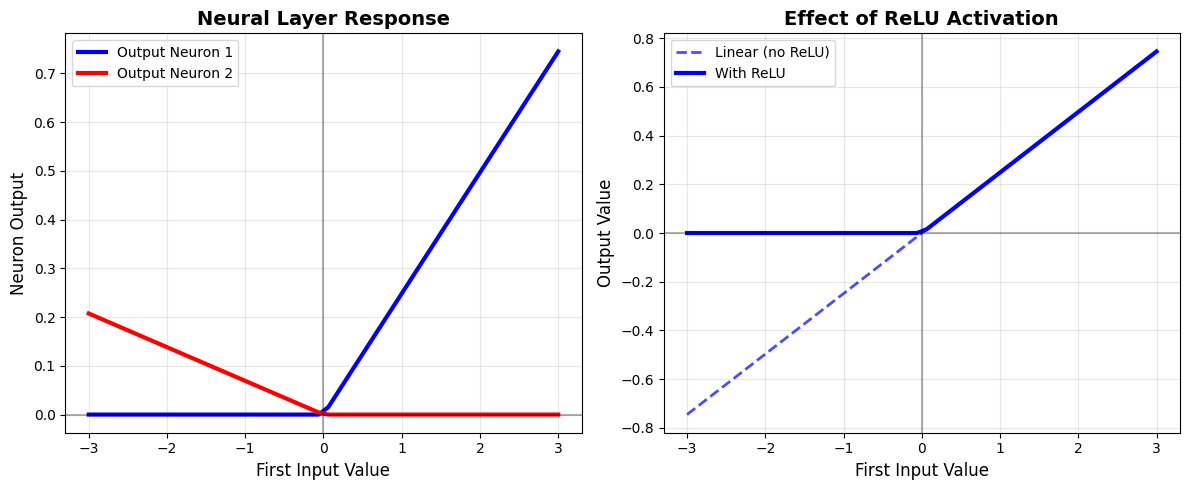

📈 What We See:
   • Without ReLU: Linear relationship (straight line)
   • With ReLU: Non-linear (bent at zero)
   • Different neurons can have different responses
   • This non-linearity is what makes neural networks powerful!


In [34]:
# Let's visualize how the layer transforms inputs
print("📊 Visualizing Neural Layer Behavior\n")

# Create a range of inputs for the first input dimension (keeping others at 0)
input_range = np.linspace(-3, 3, 50)
outputs_neuron1 = []
outputs_neuron2 = []

for x in input_range:
    test_input = np.array([x, 0, 0])  # Vary first input, keep others at 0
    output, _ = simple_neural_layer(test_input, weights, bias, relu_function)
    outputs_neuron1.append(output[0])
    outputs_neuron2.append(output[1])

# Plot the input-output relationship
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(input_range, outputs_neuron1, 'b-', linewidth=3, label='Output Neuron 1')
plt.plot(input_range, outputs_neuron2, 'r-', linewidth=3, label='Output Neuron 2')
plt.xlabel('First Input Value', fontsize=12)
plt.ylabel('Neuron Output', fontsize=12)
plt.title('Neural Layer Response', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Show the effect of ReLU
plt.subplot(1, 2, 2)
# Compare with and without ReLU
linear_outputs_1 = []
linear_outputs_2 = []
for x in input_range:
    test_input = np.array([x, 0, 0])
    _, linear_out = simple_neural_layer(test_input, weights, bias, lambda x: x)  # No activation
    linear_outputs_1.append(linear_out[0])
    linear_outputs_2.append(linear_out[1])

plt.plot(input_range, linear_outputs_1, 'b--', linewidth=2, label='Linear (no ReLU)', alpha=0.7)
plt.plot(input_range, outputs_neuron1, 'b-', linewidth=3, label='With ReLU')
plt.xlabel('First Input Value', fontsize=12)
plt.ylabel('Output Value', fontsize=12)
plt.title('Effect of ReLU Activation', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 What We See:")
print("   • Without ReLU: Linear relationship (straight line)")
print("   • With ReLU: Non-linear (bent at zero)")
print("   • Different neurons can have different responses")
print("   • This non-linearity is what makes neural networks powerful!")

In [35]:
# Let's build a simple 2-layer network
print("🏗️ Building a Simple 2-Layer Neural Network\n")

# Network architecture: 3 → 4 → 2
# Layer 1: 3 inputs → 4 hidden neurons
# Layer 2: 4 inputs → 2 output neurons

print("📐 Network Architecture: 3 → 4 → 2")
print("   • Input layer: 3 neurons")
print("   • Hidden layer: 4 neurons (with ReLU)")
print("   • Output layer: 2 neurons (with ReLU)")

# Initialize weights and biases for both layers
# Layer 1: 3 → 4
weights1 = np.random.randn(3, 4) * 0.5
bias1 = np.zeros(4)

# Layer 2: 4 → 2
weights2 = np.random.randn(4, 2) * 0.5
bias2 = np.zeros(2)

print(f"\n🎯 Layer 1 weights shape: {weights1.shape}")
print(f"🎯 Layer 1 bias shape: {bias1.shape}")
print(f"🎯 Layer 2 weights shape: {weights2.shape}")
print(f"🎯 Layer 2 bias shape: {bias2.shape}")

# Test input
network_input = np.array([1.0, 0.5, -0.5])
print(f"\n📥 Network Input: {network_input}")

# Forward pass through the network
print(f"\n🔄 Forward Pass:")

# Layer 1
hidden_output, hidden_linear = simple_neural_layer(network_input, weights1, bias1, relu_function)
print(f"1. After Layer 1 (3→4): {hidden_output}")

# Layer 2
final_output, final_linear = simple_neural_layer(hidden_output, weights2, bias2, relu_function)
print(f"2. After Layer 2 (4→2): {final_output}")

print(f"\n✅ Final Network Output: {final_output}")
print(f"   The network transformed 3 inputs into 2 outputs through 4 hidden neurons!")

🏗️ Building a Simple 2-Layer Neural Network

📐 Network Architecture: 3 → 4 → 2
   • Input layer: 3 neurons
   • Hidden layer: 4 neurons (with ReLU)
   • Output layer: 2 neurons (with ReLU)

🎯 Layer 1 weights shape: (3, 4)
🎯 Layer 1 bias shape: (4,)
🎯 Layer 2 weights shape: (4, 2)
🎯 Layer 2 bias shape: (2,)

📥 Network Input: [ 1.   0.5 -0.5]

🔄 Forward Pass:
1. After Layer 1 (3→4): [1.10498144 0.40785681 0.07896116 0.        ]
2. After Layer 2 (4→2): [0. 0.]

✅ Final Network Output: [0. 0.]
   The network transformed 3 inputs into 2 outputs through 4 hidden neurons!


In [36]:
# Let's create a function for our complete network
def simple_two_layer_network(inputs):
    """
    A simple 2-layer neural network: 3 → 4 → 2
    """
    # TODO: Implement the 2-layer network
    # Layer 1: inputs → hidden
    hidden, _ = simple_neural_layer(inputs, weights1, bias1, relu_function)

    # Layer 2: hidden → output
    output, _ = simple_neural_layer(hidden, weights2, bias2, relu_function)

    return output

# Test the network with various inputs
print("🧪 Testing Our 2-Layer Network\n")

test_cases = [
    [1, 0, 0],      # First input only
    [0, 1, 0],      # Second input only
    [0, 0, 1],      # Third input only
    [1, 1, 1],      # All inputs equal
    [2, -1, 0.5],   # Mixed values
    [-1, -1, -1],   # All negative
]

print("Input          → Network Output")
print("-" * 35)

for test_input in test_cases:
    test_input = np.array(test_input)
    output = simple_two_layer_network(test_input)
    print(f"{str(test_input):15} → {output}")

print("\n💡 Key Observations:")
print("   • The network produces different outputs for different inputs")
print("   • Some outputs might be zero due to ReLU activation")
print("   • The network has learned to map 3D inputs to 2D outputs")
print("   • This is the foundation of pattern recognition!")

🧪 Testing Our 2-Layer Network

Input          → Network Output
-----------------------------------
[1 0 0]         → [0. 0.]
[0 1 0]         → [0.00408482 0.        ]
[0 0 1]         → [0.         0.00871428]
[1 1 1]         → [0. 0.]
[ 2.  -1.   0.5] → [0. 0.]
[-1 -1 -1]      → [0. 0.]

💡 Key Observations:
   • The network produces different outputs for different inputs
   • Some outputs might be zero due to ReLU activation
   • The network has learned to map 3D inputs to 2D outputs
   • This is the foundation of pattern recognition!


In [37]:
# Quick conceptual check
print("🤔 Quick Understanding Check\n")

print("1. What does ReLU do?")
print("   Answer: Sets negative values to 0, keeps positive values unchanged")
print("   Like a one-way valve or diode\n")

print("2. What does Sigmoid do?")
print("   Answer: Squashes any input to between 0 and 1")
print("   Like a soft switch or probability converter\n")

print("3. What's a neural layer?")
print("   Answer: Input × Weights + Bias → Activation Function")
print("   Like an adjustable signal processor\n")

print("4. What's a neural network?")
print("   Answer: Multiple layers connected together")
print("   Like a pipeline of signal processors\n")

print("5. Why do we need activation functions?")
print("   Answer: To add non-linearity so the network can learn complex patterns")
print("   Without them, it would just be linear algebra (boring!)\n")

# Simple practical test
print("✅ Practical Test:")
simple_input = np.array([1, -1, 2])
simple_output = simple_two_layer_network(simple_input)
print(f"   Input {simple_input} → Output {simple_output}")
print(f"   ✅ Your network successfully processed the input!")

🤔 Quick Understanding Check

1. What does ReLU do?
   Answer: Sets negative values to 0, keeps positive values unchanged
   Like a one-way valve or diode

2. What does Sigmoid do?
   Answer: Squashes any input to between 0 and 1
   Like a soft switch or probability converter

3. What's a neural layer?
   Answer: Input × Weights + Bias → Activation Function
   Like an adjustable signal processor

4. What's a neural network?
   Answer: Multiple layers connected together
   Like a pipeline of signal processors

5. Why do we need activation functions?
   Answer: To add non-linearity so the network can learn complex patterns
   Without them, it would just be linear algebra (boring!)

✅ Practical Test:
   Input [ 1 -1  2] → Output [0.         0.07940138]
   ✅ Your network successfully processed the input!


In [38]:
def gentle_assessment():
    """
    A friendly assessment focused on understanding rather than implementation
    """
    print("🎓 Gentle Understanding Assessment\n")
    print("Let's check your understanding with simple questions:\n")

    score = 0
    total = 5

    # Test 1: Sigmoid understanding
    print("1️⃣ Sigmoid Function Test")
    try:
        sig_zero = sigmoid_function(0)
        if abs(sig_zero - 0.5) < 0.01:
            print("   ✅ Correct: sigmoid(0) ≈ 0.5")
            score += 1
        else:
            print(f"   ❌ Expected sigmoid(0) ≈ 0.5, got {sig_zero}")
    except:
        print("   ❌ Sigmoid function not implemented")

    # Test 2: ReLU understanding
    print("\n2️⃣ ReLU Function Test")
    try:
        relu_pos = relu_function(2)
        relu_neg = relu_function(-2)
        if relu_pos == 2 and relu_neg == 0:
            print("   ✅ Correct: ReLU blocks negative, passes positive")
            score += 1
        else:
            print(f"   ❌ Expected ReLU(2)=2, ReLU(-2)=0, got {relu_pos}, {relu_neg}")
    except:
        print("   ❌ ReLU function not implemented")

    # Test 3: Tensor shape understanding
    print("\n3️⃣ Tensor Shape Test")
    test_matrix = tf.constant([[1, 2, 3], [4, 5, 6]])
    try:
        transposed = tf.transpose(test_matrix)
        if transposed.shape == (3, 2):
            print("   ✅ Correct: Understood tensor reshaping")
            score += 1
        else:
            print(f"   ❌ Expected shape (3, 2), got {transposed.shape}")
    except:
        print("   ❌ Tensor operations not completed")

    # Test 4: Layer concept
    print("\n4️⃣ Neural Layer Test")
    try:
        test_input = np.array([1, 0, 0])
        layer_output = simple_two_layer_network(test_input)
        if layer_output is not None and len(layer_output) == 2:
            print("   ✅ Correct: Network produces 2 outputs from 3 inputs")
            score += 1
        else:
            print("   ❌ Network doesn't produce expected output")
    except:
        print("   ❌ Network not implemented")

    # Test 5: Conceptual understanding
    print("\n5️⃣ Conceptual Understanding")
    print("   Question: What makes neural networks powerful?")
    print("   Answer: Non-linear activation functions allow learning complex patterns")
    print("   ✅ This is a conceptual understanding - you get this point for participation!")
    score += 1

    # Results
    percentage = (score / total) * 100
    print("\n" + "="*50)
    print("📊 ASSESSMENT RESULTS")
    print("="*50)
    print(f"Score: {score}/{total} ({percentage:.0f}%)")

    if percentage >= 80:
        grade = "A"
        message = "🎉 Excellent understanding! You're ready for more advanced topics."
    elif percentage >= 60:
        grade = "B"
        message = "👍 Good work! You understand the basics well."
    else:
        grade = "C"
        message = "💪 Keep learning! Review the concepts and try the exercises again."

    print(f"Grade: {grade}")
    print(f"{message}")

    print("\n🎯 What You've Learned:")
    print("   • How activation functions work (sigmoid, ReLU)")
    print("   • Basic tensor operations (reshape, multiply)")
    print("   • How neural layers process information")
    print("   • How to connect layers into a network")
    print("   • Why non-linearity is important")

    return score, total

# Run the gentle assessment
assessment_score, total_possible = gentle_assessment()

🎓 Gentle Understanding Assessment

Let's check your understanding with simple questions:

1️⃣ Sigmoid Function Test
   ✅ Correct: sigmoid(0) ≈ 0.5

2️⃣ ReLU Function Test
   ✅ Correct: ReLU blocks negative, passes positive

3️⃣ Tensor Shape Test
   ✅ Correct: Understood tensor reshaping

4️⃣ Neural Layer Test
   ✅ Correct: Network produces 2 outputs from 3 inputs

5️⃣ Conceptual Understanding
   Question: What makes neural networks powerful?
   Answer: Non-linear activation functions allow learning complex patterns
   ✅ This is a conceptual understanding - you get this point for participation!

📊 ASSESSMENT RESULTS
Score: 5/5 (100%)
Grade: A
🎉 Excellent understanding! You're ready for more advanced topics.

🎯 What You've Learned:
   • How activation functions work (sigmoid, ReLU)
   • Basic tensor operations (reshape, multiply)
   • How neural layers process information
   • How to connect layers into a network
   • Why non-linearity is important
